## 성인 가해자 관련 자료 분석

작성기관 : 방송통신위원회 인터넷이용과정책과 인터넷이용과정책과 (☎ 02-2110-1522)

조사기관 : 사이버폭력 경험 및 인식 현황 등을 파악하여 사이버폭력 예방과 대응 정책 수립의 기초자료로 활용하기 위함

통계(활용)분야 · 실태 : 범죄·안전


<조사 대상 범위>

청소년 : 초등학교 4학년 이상 중·고등학생 학령별 각 3,000명

성인 : 전국 17개 시·도의 7,500가구 내 만 20세 이상 69세 이하 가구원 중 최근 1개월 이내 1회 이상 인터넷 또는 스마트폰을 이용한 자


<조사단위 및 조사대상 규모>

-개인

(학생) 조사 기준일(2021. 9. 1) 현재 전국의 초등학교 4학년부터 고등학교 3학년까지 재학중인 학생 9,000명

(성인) 조사 기준일(2021. 9. 1) 현재 대한민국에 상주하는 만20세 이상 69세 이하 국민 중 최근 1개월 이내 1회 이상 인터넷 또는 스마트폰을 이용한(외국인 제외) 일반 성인 7,500명


In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl                 # 패키지 관련
import matplotlib.font_manager as fm     # 패키지 리소스 즉 자원 중 폰트 관련 모듈

In [2]:
# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()                

    return F

In [3]:
def withdraw(cyberDF):
    #cyberDF파일에서 연령별 자료 추출
    cyberDF_age=cyberDF.xs('연령별', level = 0)

    #cyberDF파일에서 학력별 자료 추출
    cyberDF_edu=cyberDF.xs('학력별', level = 0)

    #cyberDF파일에서 소득별 자료 추출
    cyberDF_income=cyberDF.xs('월평균 가구소득별', level = 0)

    return cyberDF_age.T, cyberDF_edu.T, cyberDF_income.T

In [41]:
# 함수 이름 : draw_graph
# 함수 기능 : 데이터프레임으로 막대그래프 그리기.
# ==========================================================
def draw_graph(age, edu, income) :
    # age에서 연령별 그래프 출력
    g_age = age.plot(kind='barh') # kind = bar ---> 세로 / barh ---> 가로 그래프 
    plt.title(f'[연령별]')
        
    # edu에서 학력별 그래프 출력
    g_edu = edu.plot(kind='barh')
    plt.title(f'[학력별]')
    
    # income에서 소득별
    g_income = income.plot(kind='barh')
    plt.title(f'[소득별]')
    plt.show()

In [42]:
#폰트 파일의 경로 저장.
font_path = r'C:\Windows\Fonts\gulim.ttc'

# matplotlib 패키지에 한글 폰트 설정. 
myfont = fm.FontProperties(fname = font_path).get_name() 

#FontProperties 객체가 됨.
mpl.rc('font', family = myfont)

In [43]:
file1 = '../성인_가해경험/사이버폭력_가해_경험_20240119170321.csv'

# 결과값으로 info() 출력
cyberDF1 = clean(file1)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가해 경험률    52 non-null     float64
 1   사이버 언어폭력  52 non-null     float64
 2   사이버 명예훼손  52 non-null     float64
 3   사이버 스토킹   52 non-null     float64
 4   사이버 성폭력   52 non-null     float64
 5   신상정보 유출   52 non-null     float64
 6   사이버 따돌림   52 non-null     float64
 7   사이버 갈취    52 non-null     float64
 8   사이버 강요    52 non-null     float64
dtypes: float64(9)
memory usage: 7.1 KB


In [44]:
# 사이버폭력_가해_경험_연령별, 학력별, 소득별 자료 추출
cyberDF1_age, cyberDF1_edu, cyberDF1_income = withdraw(cyberDF1)

In [45]:
# 사이버폭력_가해_경험_경로_연령별, 학력별, 소득별 자료 추출
file2 = '../성인_가해경험/사이버폭력_가해_경험_경로_20240121162324.csv'
cyberDF2 = clean(file2)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   문자 및 인스턴트 메시지 (카카오톡 라인 페이스북 메신저 텔레그램 등)  50 non-null     float64
 1   SNS (페이스북 인스타그램 블로그 등)                   50 non-null     float64
 2   온라인 게임                                   50 non-null     float64
 3   커뮤니티·동호회 (네이버·다음카페 블라인드 에스크 등)           50 non-null     float64
 4   개인 방송 서비스 (유튜브 아프리카TV 트위치 틱톡 등)          50 non-null     float64
 5   메타버스 (제페토 이프렌드 등)                        50 non-null     float64
 6   기타                                       50 non-null     float64
dtypes: float64(7)
memory usage: 6.2 KB


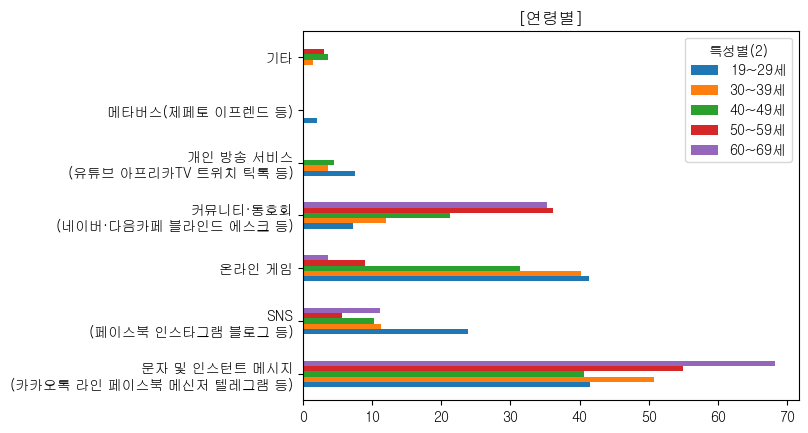

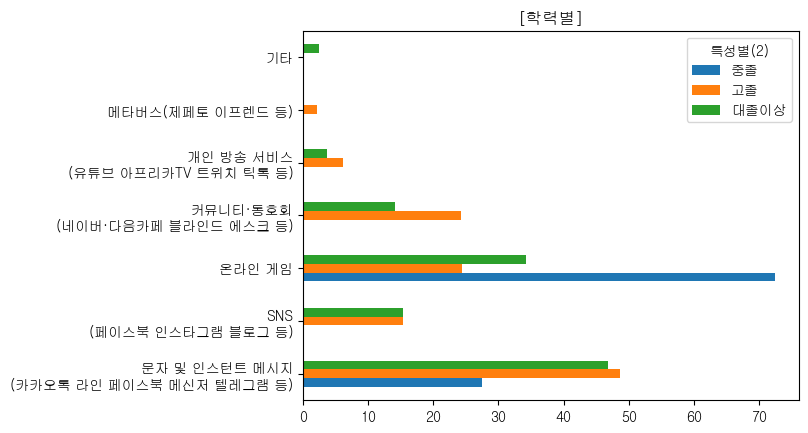

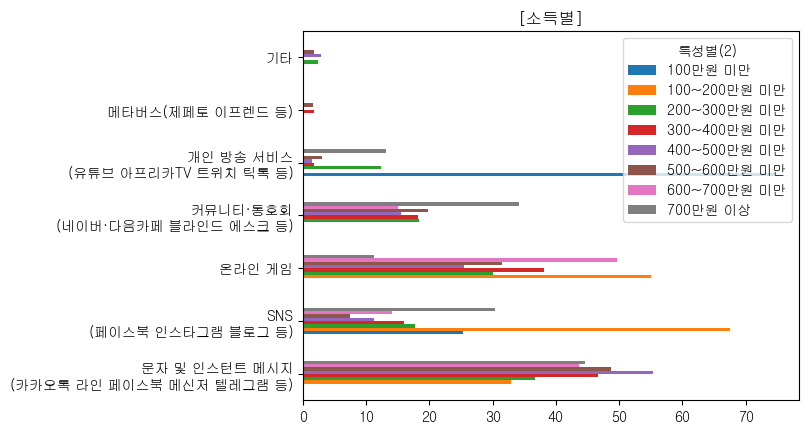

In [46]:
# 사이버폭력_가해_경로_연령별, 학력별, 소득별 자료 추출
cyberDF2_age, cyberDF2_edu, cyberDF2_income = withdraw(cyberDF2)

cyberDF2_age.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']

cyberDF2_edu.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']

cyberDF2_income.index = ['문자 및 인스턴트 메시지\n(카카오톡 라인 페이스북 메신저 텔레그램 등)', 'SNS\n(페이스북 인스타그램 블로그 등)', '온라인 게임', 
                      '커뮤니티·동호회\n(네이버·다음카페 블라인드 에스크 등)', '개인 방송 서비스\n(유튜브 아프리카TV 트위치 틱톡 등)', '메타버스(제페토 이프렌드 등)', '기타']

draw_graph(cyberDF2_age, cyberDF2_edu, cyberDF2_income)

In [47]:
# 사이버폭력__연령별, 학력별, 소득별 자료 추출
file3 = '../성인_가해경험/사이버폭력_가해자_유형_20240119170714.csv'
cyberDF3 = clean(file3)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   전혀 모르는 사람      52 non-null     float64
 1   친한 친구          52 non-null     float64
 2   선후배            52 non-null     float64
 3   얼굴만 아는 사이      52 non-null     float64
 4   온라인에서 알게 된 사람  52 non-null     float64
 5   동료             52 non-null     float64
dtypes: float64(6)
memory usage: 5.9 KB


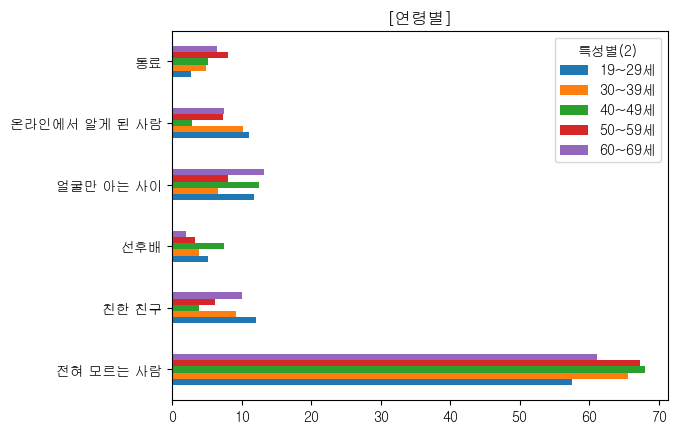

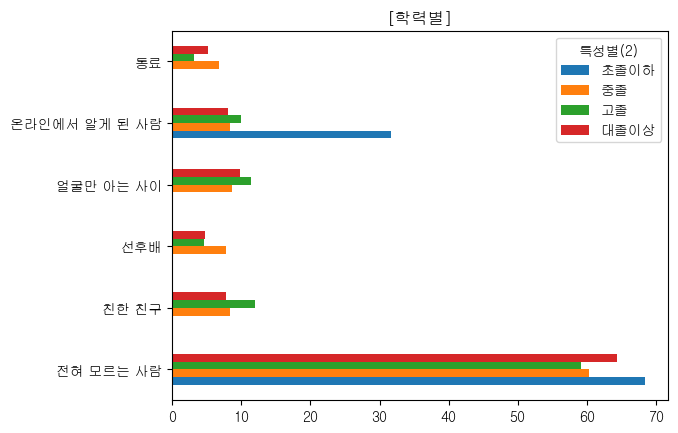

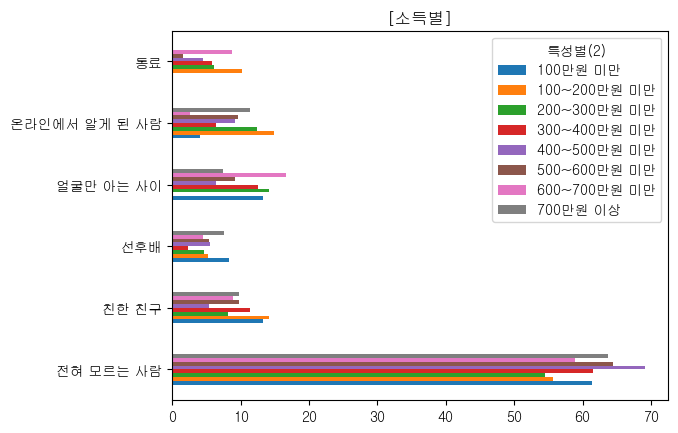

In [48]:
# 사이버폭력_가해자_유형_연령별, 학력별, 소득별 자료 추출
cyberDF3_age, cyberDF3_edu, cyberDF3_income = withdraw(cyberDF3)
draw_graph(cyberDF3_age, cyberDF3_edu, cyberDF3_income)

In [49]:
file4 = '../성인_가해경험/사이버폭력_가해_대상_복수_응답__20240122000016.csv'
cyberDF4 = clean(file4)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   친한 친구          50 non-null     float64
 1   선후배            50 non-null     float64
 2   전혀 모르는 사람      50 non-null     float64
 3   유명인            50 non-null     float64
 4   동료             50 non-null     float64
 5   얼굴만 아는 사이      50 non-null     float64
 6   온라인에서 알게 된 사람  50 non-null     float64
dtypes: float64(7)
memory usage: 6.2 KB


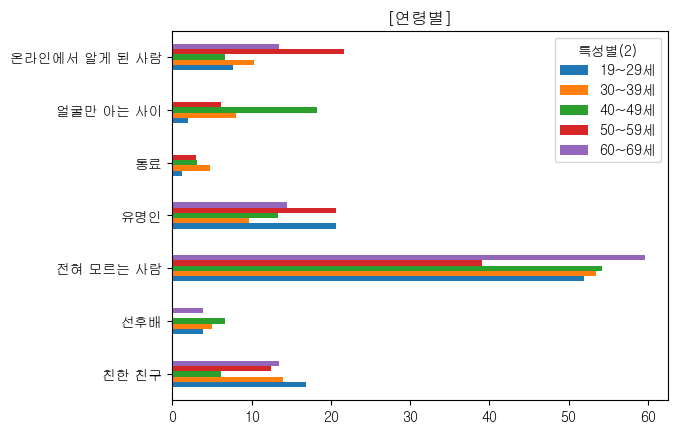

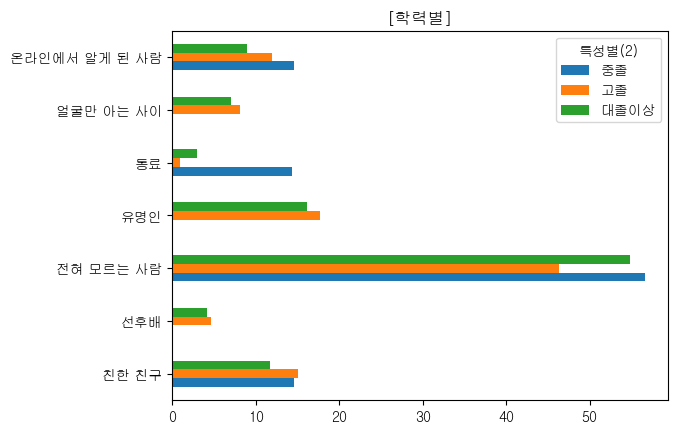

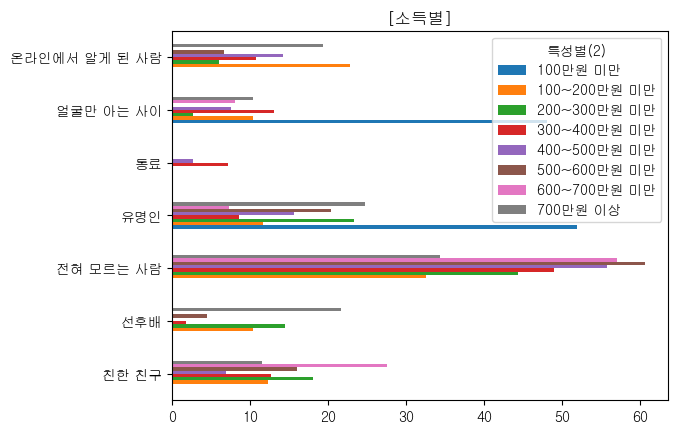

In [50]:
# 사이버폭력_가해 대상_연령별, 학력별, 소득별 자료 추출
cyberDF4_age, cyberDF4_edu, cyberDF4_income = withdraw(cyberDF4)
draw_graph(cyberDF4_age, cyberDF4_edu, cyberDF4_income)

In [51]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (1) 정당하다고 생각하는 의견
file5 = '../성인_가해경험/사이버폭력_가해_경험_후_심리상태__정당한_행동이라_생각했음_20240122001016.csv'
cyberDF5 = clean(file5)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  50 non-null     float64
 1   그렇지 않다     50 non-null     float64
 2   그렇다        50 non-null     float64
 3   매우 그렇다     50 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


<Figure size 2500x2500 with 0 Axes>

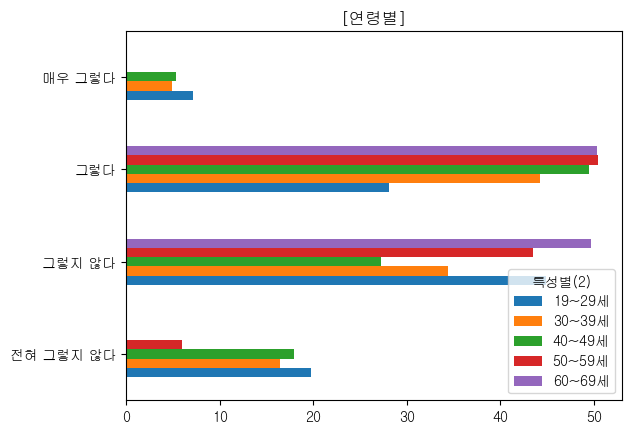

<Figure size 2500x2500 with 0 Axes>

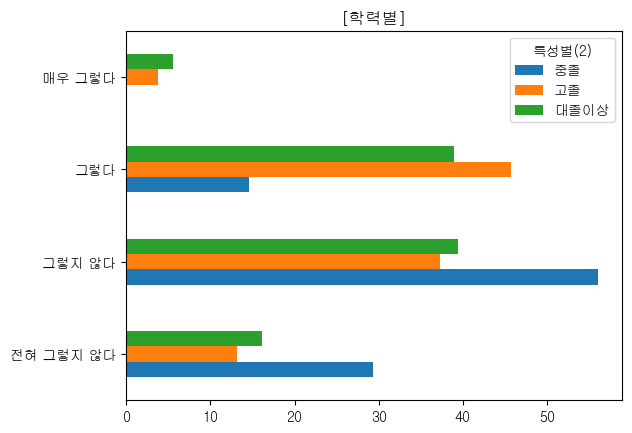

<Figure size 2500x2500 with 0 Axes>

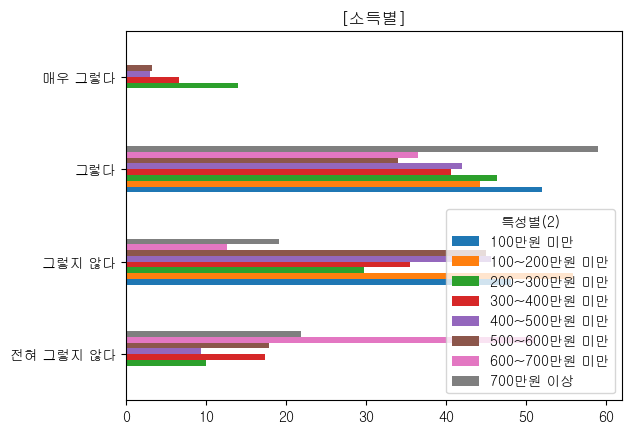

In [25]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (1) 정당하다고 생각하는 의견
cyberDF5_age, cyberDF5_edu, cyberDF5_income = withdraw(cyberDF5)
draw_graph(cyberDF5_age, cyberDF5_edu, cyberDF5_income)

In [17]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (2) 아무느낌도 없음
file6 = '../성인_가해경험/사이버폭력_가해_경험_후_심리상태__아무런_느낌이_없었음_20240122001054.csv'
cyberDF6 = clean(file6)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  50 non-null     float64
 1   그렇지 않다     50 non-null     float64
 2   그렇다        50 non-null     float64
 3   매우 그렇다     50 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


<Figure size 2500x2500 with 0 Axes>

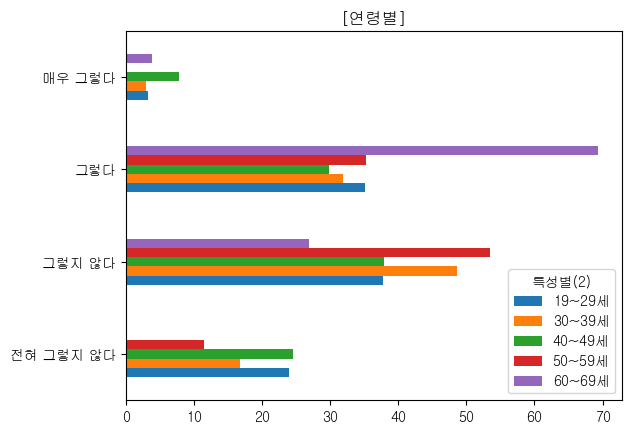

<Figure size 2500x2500 with 0 Axes>

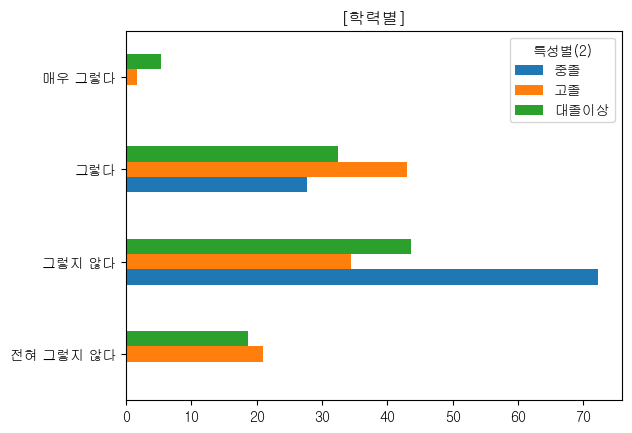

<Figure size 2500x2500 with 0 Axes>

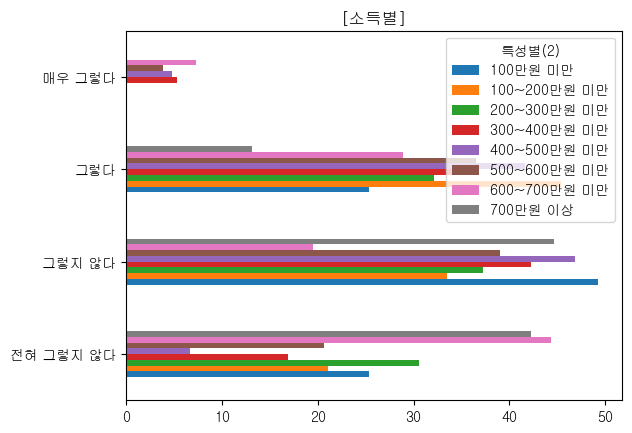

In [26]:
cyberDF6_age, cyberDF6_edu, cyberDF6_income = withdraw(cyberDF6)
draw_graph(cyberDF6_age, cyberDF6_edu, cyberDF6_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  50 non-null     float64
 1   그렇지 않다     50 non-null     float64
 2   그렇다        50 non-null     float64
 3   매우 그렇다     50 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


<Figure size 2500x2500 with 0 Axes>

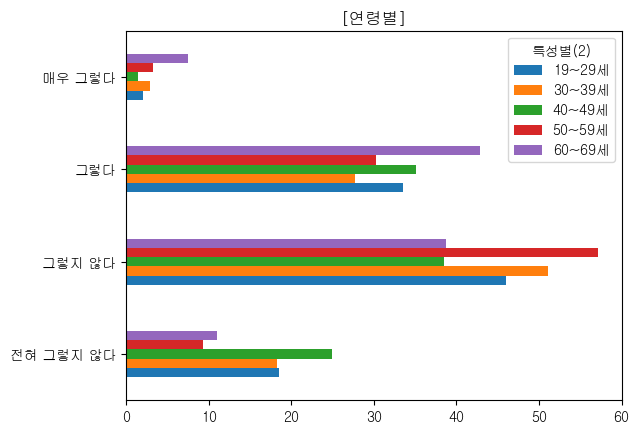

<Figure size 2500x2500 with 0 Axes>

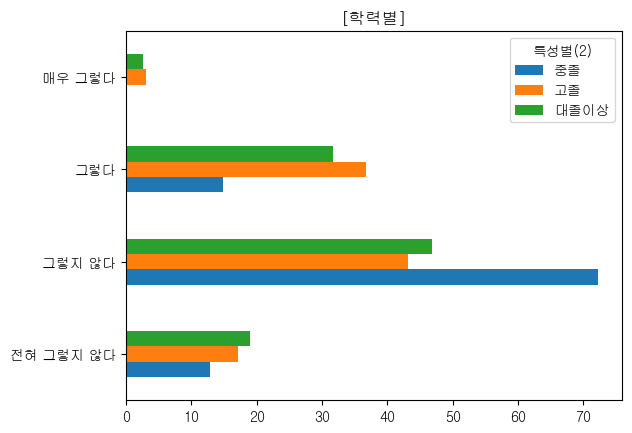

<Figure size 2500x2500 with 0 Axes>

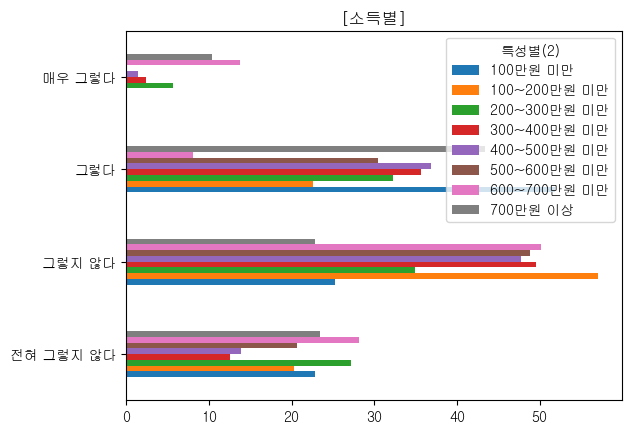

In [27]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (3)문제가 생길 것 같아 걱정되었음.
file7 = '../성인_가해경험/사이버폭력_가해_경험_후_심리상태__문제가_생길_것_같아_걱정되었음_20240122001033.csv'
cyberDF7 = clean(file7)
cyberDF7_age, cyberDF7_edu, cyberDF7_income = withdraw(cyberDF7)
draw_graph(cyberDF7_age, cyberDF7_edu, cyberDF7_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  50 non-null     float64
 1   그렇지 않다     50 non-null     float64
 2   그렇다        50 non-null     float64
 3   매우 그렇다     50 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


<Figure size 2500x2500 with 0 Axes>

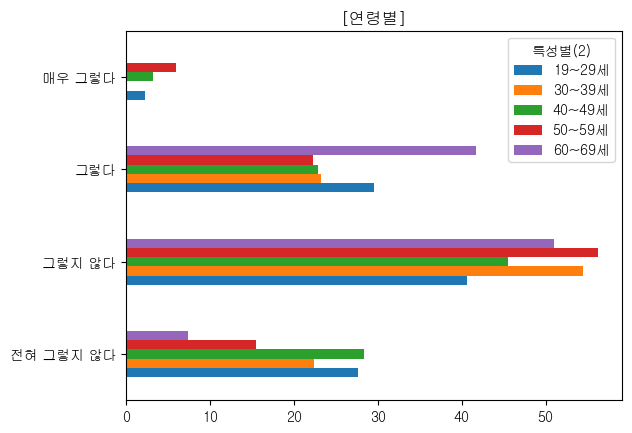

<Figure size 2500x2500 with 0 Axes>

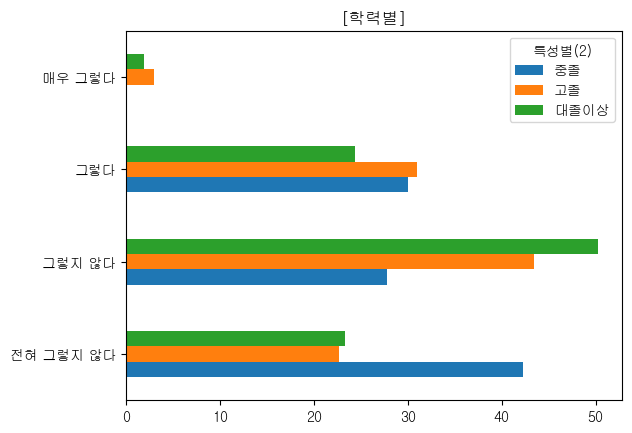

<Figure size 2500x2500 with 0 Axes>

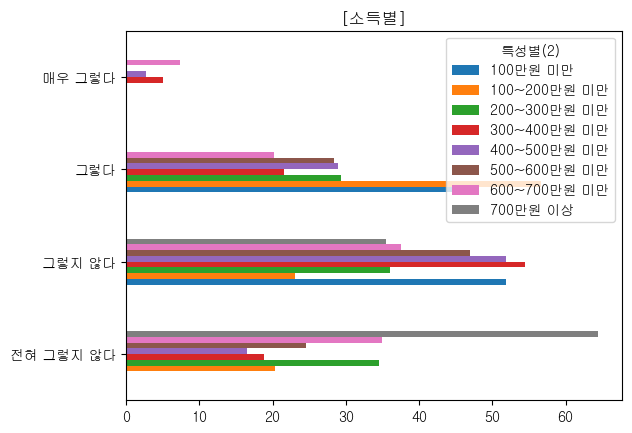

In [28]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (4)흥미롭고 재미있었음.
file8 = '../성인_가해경험/사이버폭력_가해_경험_후_심리상태__흥미롭고_재미있었음_20240122001044.csv'
cyberDF8 = clean(file8)
cyberDF8_age, cyberDF8_edu, cyberDF8_income = withdraw(cyberDF8)
draw_graph(cyberDF8_age, cyberDF8_edu, cyberDF8_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  50 non-null     float64
 1   그렇지 않다     50 non-null     float64
 2   그렇다        50 non-null     float64
 3   매우 그렇다     50 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


<Figure size 2500x2500 with 0 Axes>

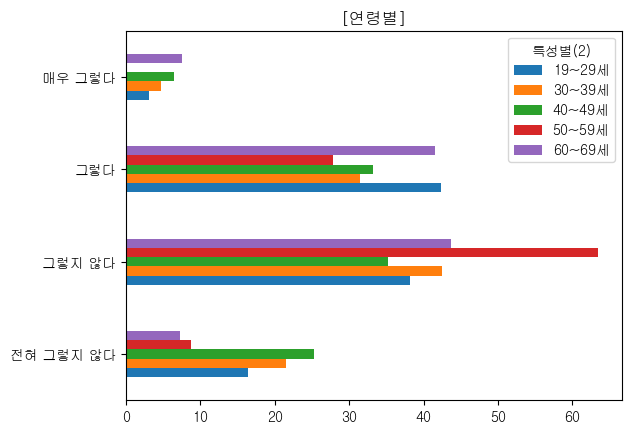

<Figure size 2500x2500 with 0 Axes>

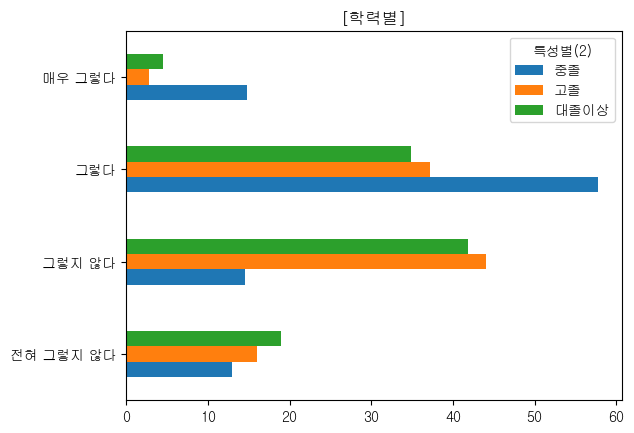

<Figure size 2500x2500 with 0 Axes>

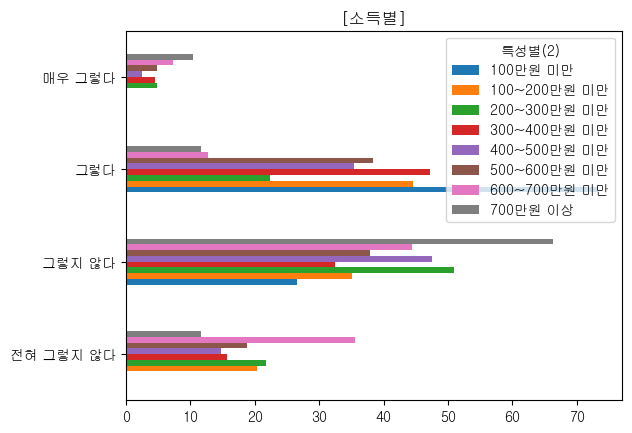

In [29]:
# 사이버폭력_심리 상태_연령별, 학력별, 소득별 자료 추출 (5) 상대방에게 미안하고 후회스러움.
file9 = '../성인_가해경험/사이버폭력_가해_경험_후_심리상태__상대방에게_미안하고_후회스러웠음_20240122001024.csv'
cyberDF9 = clean(file9)
cyberDF9_age, cyberDF9_edu, cyberDF9_income = withdraw(cyberDF9)
draw_graph(cyberDF9_age, cyberDF9_edu, cyberDF9_income)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   상대방이 싫어서 상대방에게 화가 나서         50 non-null     float64
 1   내 의견과 달라서 상대방이 틀린 말을 해서      50 non-null     float64
 2   상대방이 먼저 그런 행동을 해서 보복하기 위해    50 non-null     float64
 3   재미나 장난으로 스트레스 해소를 위해         50 non-null     float64
 4   주변에서 함께 하므로친구나 동료들과 어울리기 위해  50 non-null     float64
 5   그냥 특별한 이유 없이                 50 non-null     float64
dtypes: float64(6)
memory usage: 5.8 KB


<Figure size 2500x2500 with 0 Axes>

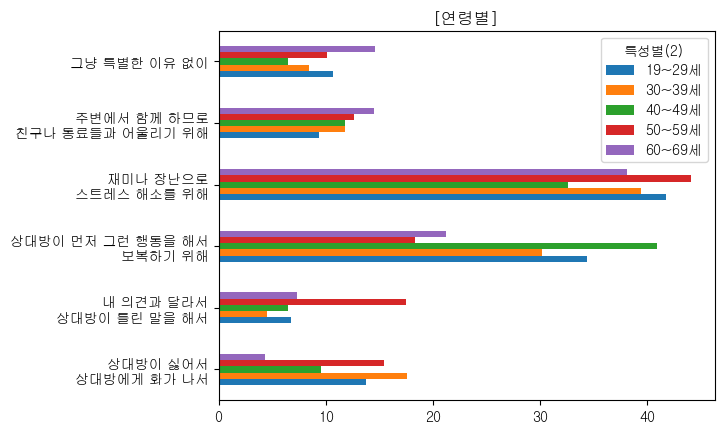

<Figure size 2500x2500 with 0 Axes>

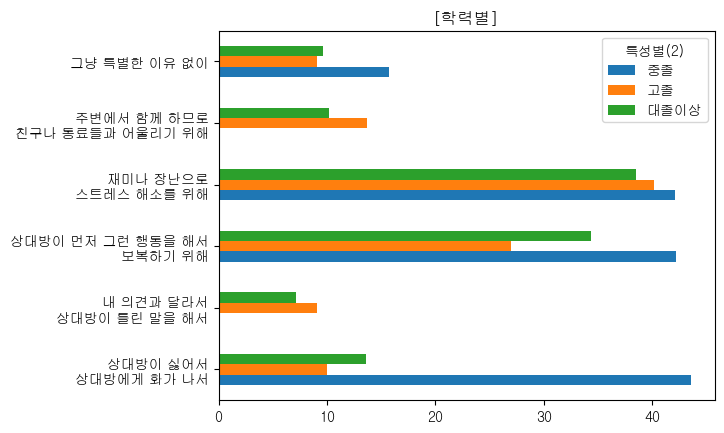

<Figure size 2500x2500 with 0 Axes>

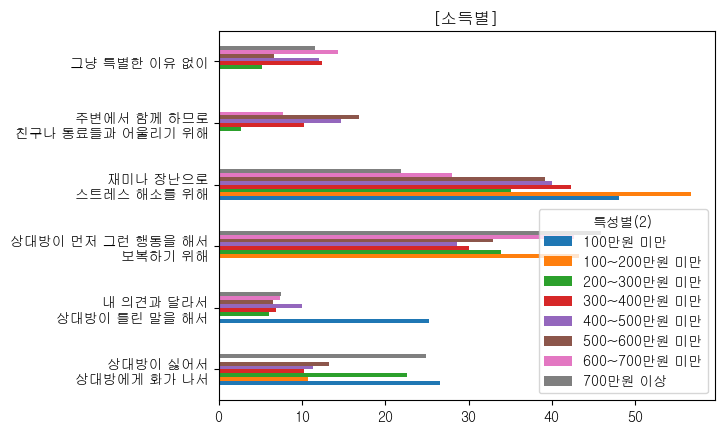

In [34]:
# 사이버폭력_가해_동기_연령별, 학력별, 소득별 자료 추출
file10 = '../성인_가해경험/사이버폭력_가해_동기_20240122133405.csv'
cyberDF10 = clean(file10)
cyberDF10_age, cyberDF10_edu, cyberDF10_income = withdraw(cyberDF10)
cyberDF10_age.index = ['상대방이 싫어서\n상대방에게 화가 나서', '내 의견과 달라서\n상대방이 틀린 말을 해서',
       '상대방이 먼저 그런 행동을 해서\n보복하기 위해', '재미나 장난으로\n스트레스 해소를 위해',
       '주변에서 함께 하므로\n친구나 동료들과 어울리기 위해', '그냥 특별한 이유 없이']
cyberDF10_edu.index = ['상대방이 싫어서\n상대방에게 화가 나서', '내 의견과 달라서\n상대방이 틀린 말을 해서',
       '상대방이 먼저 그런 행동을 해서\n보복하기 위해', '재미나 장난으로\n스트레스 해소를 위해',
       '주변에서 함께 하므로\n친구나 동료들과 어울리기 위해', '그냥 특별한 이유 없이']
cyberDF10_income.index = ['상대방이 싫어서\n상대방에게 화가 나서', '내 의견과 달라서\n상대방이 틀린 말을 해서',
       '상대방이 먼저 그런 행동을 해서\n보복하기 위해', '재미나 장난으로\n스트레스 해소를 위해',
       '주변에서 함께 하므로\n친구나 동료들과 어울리기 위해', '그냥 특별한 이유 없이']

draw_graph(cyberDF10_age, cyberDF10_edu, cyberDF10_income)